# Uczenie nadzorowane - predykcja

Boston Housing Dataset to popularny zbiór danych stosowany w dziedzinie uczenia maszynowego do zadań regresji. Zbiór ten zawiera informacje na temat cen domów w różnych dzielnicach miasta Boston w latach 70-tych. Zbiór składa się z 506 rekordów i 13 atrybutów, w tym cechy takie jak średnia liczba pokoi, odległość od pięciu dużych centrów zatrudnienia czy wskaźnik przestępczości na mieszkańca. Zbiór ten pozwala na naukę różnych technik regresji, od prostych modeli liniowych po bardziej złożone modele bazujące na sieciach neuronowych czy algorytmach drzew decyzyjnych.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
dataset = pd.read_csv(url,delim_whitespace=True, names = names)
display(dataset)

C:\Users\tdroz\AppData\Local\Temp\ipykernel_3904\2000100776.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv(url,delim_whitespace=True, names = names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Podstawowe EDA na danych

Wykonaj podstawową Exploratory Data Analysis (EDA) na zbiorze danych, aby zrozumieć jego strukturę i charakterystyki. Możesz użyć bibliotek takich jak pandas, numpy, matplotlib i seaborn. W szczególności sprawdź współliniowość zmiennych.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

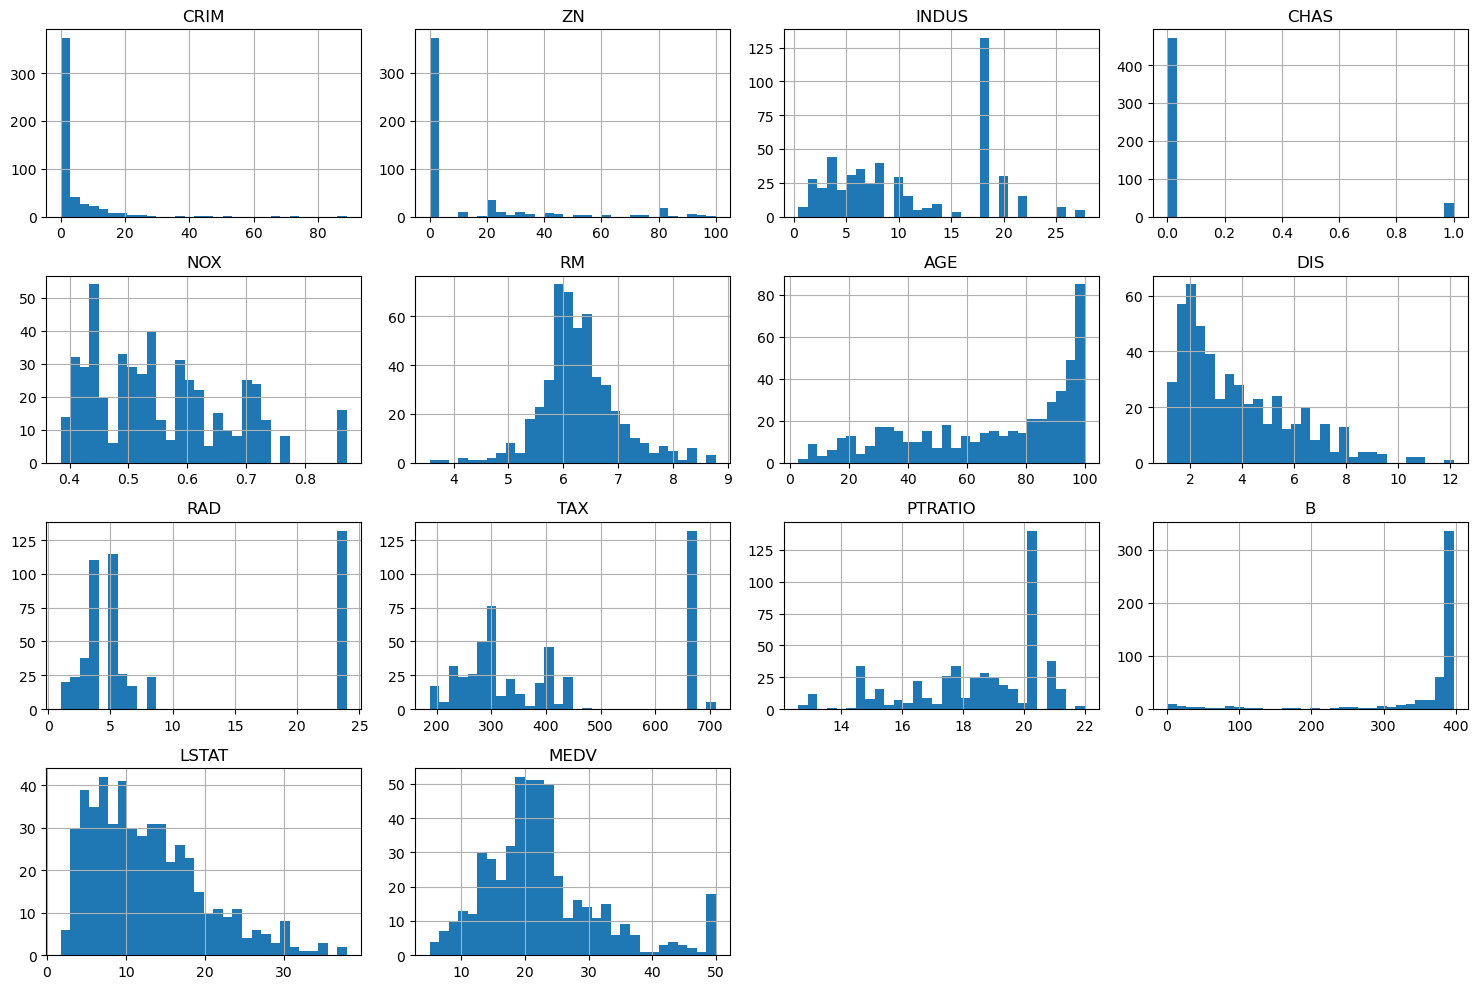

In [46]:
display(dataset.info())
display(dataset.describe())
display(dataset.isnull().sum())
display(dataset.dtypes)

dataset.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Macierz korelacji')

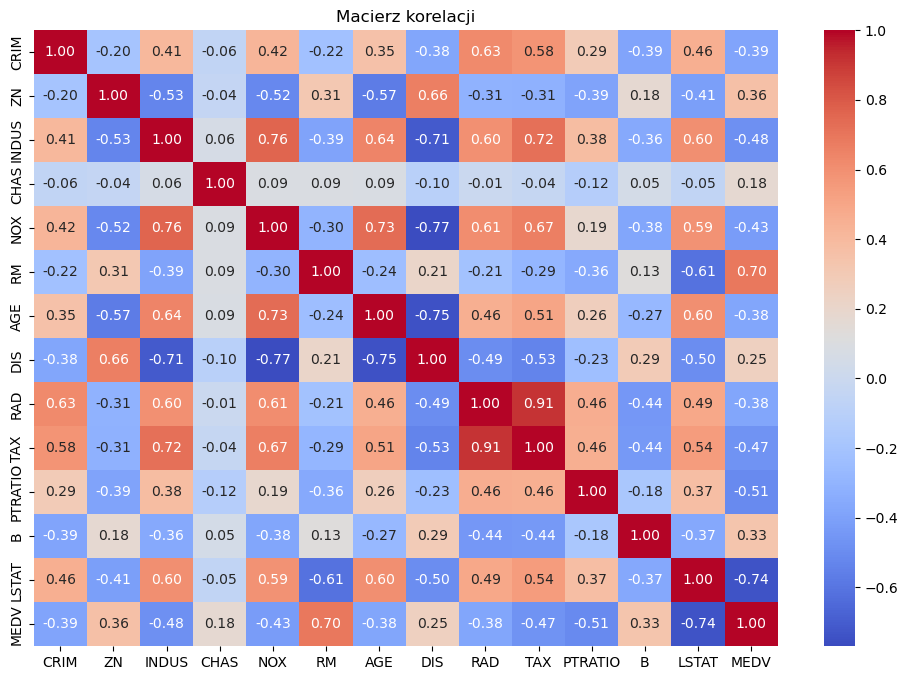

In [47]:
correlation = dataset.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = "coolwarm", fmt=".2f")
plt.title("Macierz korelacji")

VIF (Variance Inflation Factor) mierzy jak bardzo wariancja  współczynnika regresji danej zmiennej rośnie z powodu współliniowości z innymi zmiennymi w modelu.
Interpretacja wyników:
1           Brak współliniowości
1–5	        Akceptowalna współliniowość
5–10	    Umiarkowana 
>10	        Wysoka 

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = dataset.select_dtypes(include=[np.number]).dropna()
X = add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif.sort_values("VIF", ascending=False))

,Variable,VIF
0,const,645.977937
10,TAX,9.205542
9,RAD,7.808198
5,NOX,4.586920
8,DIS,4.396007
3,INDUS,3.992503
14,MEDV,3.855684
13,LSTAT,3.581585
7,AGE,3.100843
2,ZN,2.352186


Widzimy, że wartość VIF jest wysoka dla zmiennych TAX oraz dla RAD. widoczna jest więc duża współliniowość. Sprawdzimy teraz korelacje tych zmiennych z MEDV i zdecydujemy którą z nich usuniemy z ramki danych. Wybierzemy tę zmienną, która ma mniejszą korelację z MEDV, bo będzie mniej istotna dla naszego modelu.

In [49]:
display(dataset[['TAX', 'RAD', 'MEDV']].corr())

,TAX,RAD,MEDV
TAX,1.000000,0.910228,-0.468536
RAD,0.910228,1.000000,-0.381626
MEDV,-0.468536,-0.381626,1.000000


Zmienna TAX ma silniejszą negatywną korelację z MEDV.
Usuniemy więc zmienną RAD

In [50]:
dataset = dataset.drop(["RAD"],axis = 1)


X = dataset.select_dtypes(include=[np.number]).dropna()
X = add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif.sort_values("VIF", ascending=False))

,Variable,VIF
0,const,576.630612
5,NOX,4.441583
8,DIS,4.385150
13,MEDV,3.695840
3,INDUS,3.689281
12,LSTAT,3.531961
9,TAX,3.417498
7,AGE,3.083543
2,ZN,2.310513
6,RM,2.250604


# Podzielenie zbioru na treningowy i testowy


In [51]:
from sklearn.model_selection import train_test_split

X = dataset.drop("MEDV", axis = 1)
y = dataset["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)


 Zbadaj różne modele takie jak regresja liniowa i XGBoost. Wykorzystaj bibliotekę sklearn, aby stworzyć modele i dopasować je do zbioru treningowego.

In [52]:
# Regresja liniowa

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


# XGBoost

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, ...)

5.     Zastosuj GridSearchCV, aby dobrać optymalne hiperparametry dla modelu XGBoost. Możesz użyć różnych metryk ewaluacyjnych, takich jak MSE, RMSE, MAE, R2.

In [53]:
# GridSearchCV dla XGBoost
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.3], 'max_depth': [3, 5, 7, 9], 'n_estimators': [10, 50, 100, 200]}
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", colsample_bytree=0.3, random_state=42)

grid = GridSearchCV(estimator=xg_reg, param_grid=params, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

print(f"Best score: {grid.best_score_} using params: {grid.best_params_}")

Best score: -14.110707423864838 using params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Porównaj wyniki różnych modeli na zbiorze testowym, wykorzystując wybrane metryki ewaluacyjne.

In [54]:
# Ewaluacja modeli 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regresja liniowa
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Linear Regression - MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Linear Regression - R2: {r2_score(y_test, y_pred_lr)}")

# XGBoost
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, random_state=42)
xg_reg.fit(X_train, y_train)
y_pred_xg = xg_reg.predict(X_test)
print(f"XGBoost - MSE: {mean_squared_error(y_test, y_pred_xg)}")
print(f"XGBoost - MAE: {mean_absolute_error(y_test, y_pred_xg)}")
print(f"XGBoost - R2: {r2_score(y_test, y_pred_xg)}")

Linear Regression - MSE: 26.47094561959051
Linear Regression - MAE: 3.35590701033756
Linear Regression - R2: 0.6390347738951433
XGBoost - MSE: 11.211212737671428
XGBoost - MAE: 2.0431670020608337
XGBoost - R2: 0.847120764066387


Sprawdź czy spełnione są założenia dla regresji liniowej

Liniowość — zależność między zmienną niezależną a zależną jest liniowa.

Normalność reszt — reszty (błędy) mają rozkład normalny.

Homoscedastyczność — wariancja reszt jest stała (niezależna od wartości zmiennych niezależnych).

Brak współliniowości — zmienne niezależne nie są ze sobą silnie skorelowane.

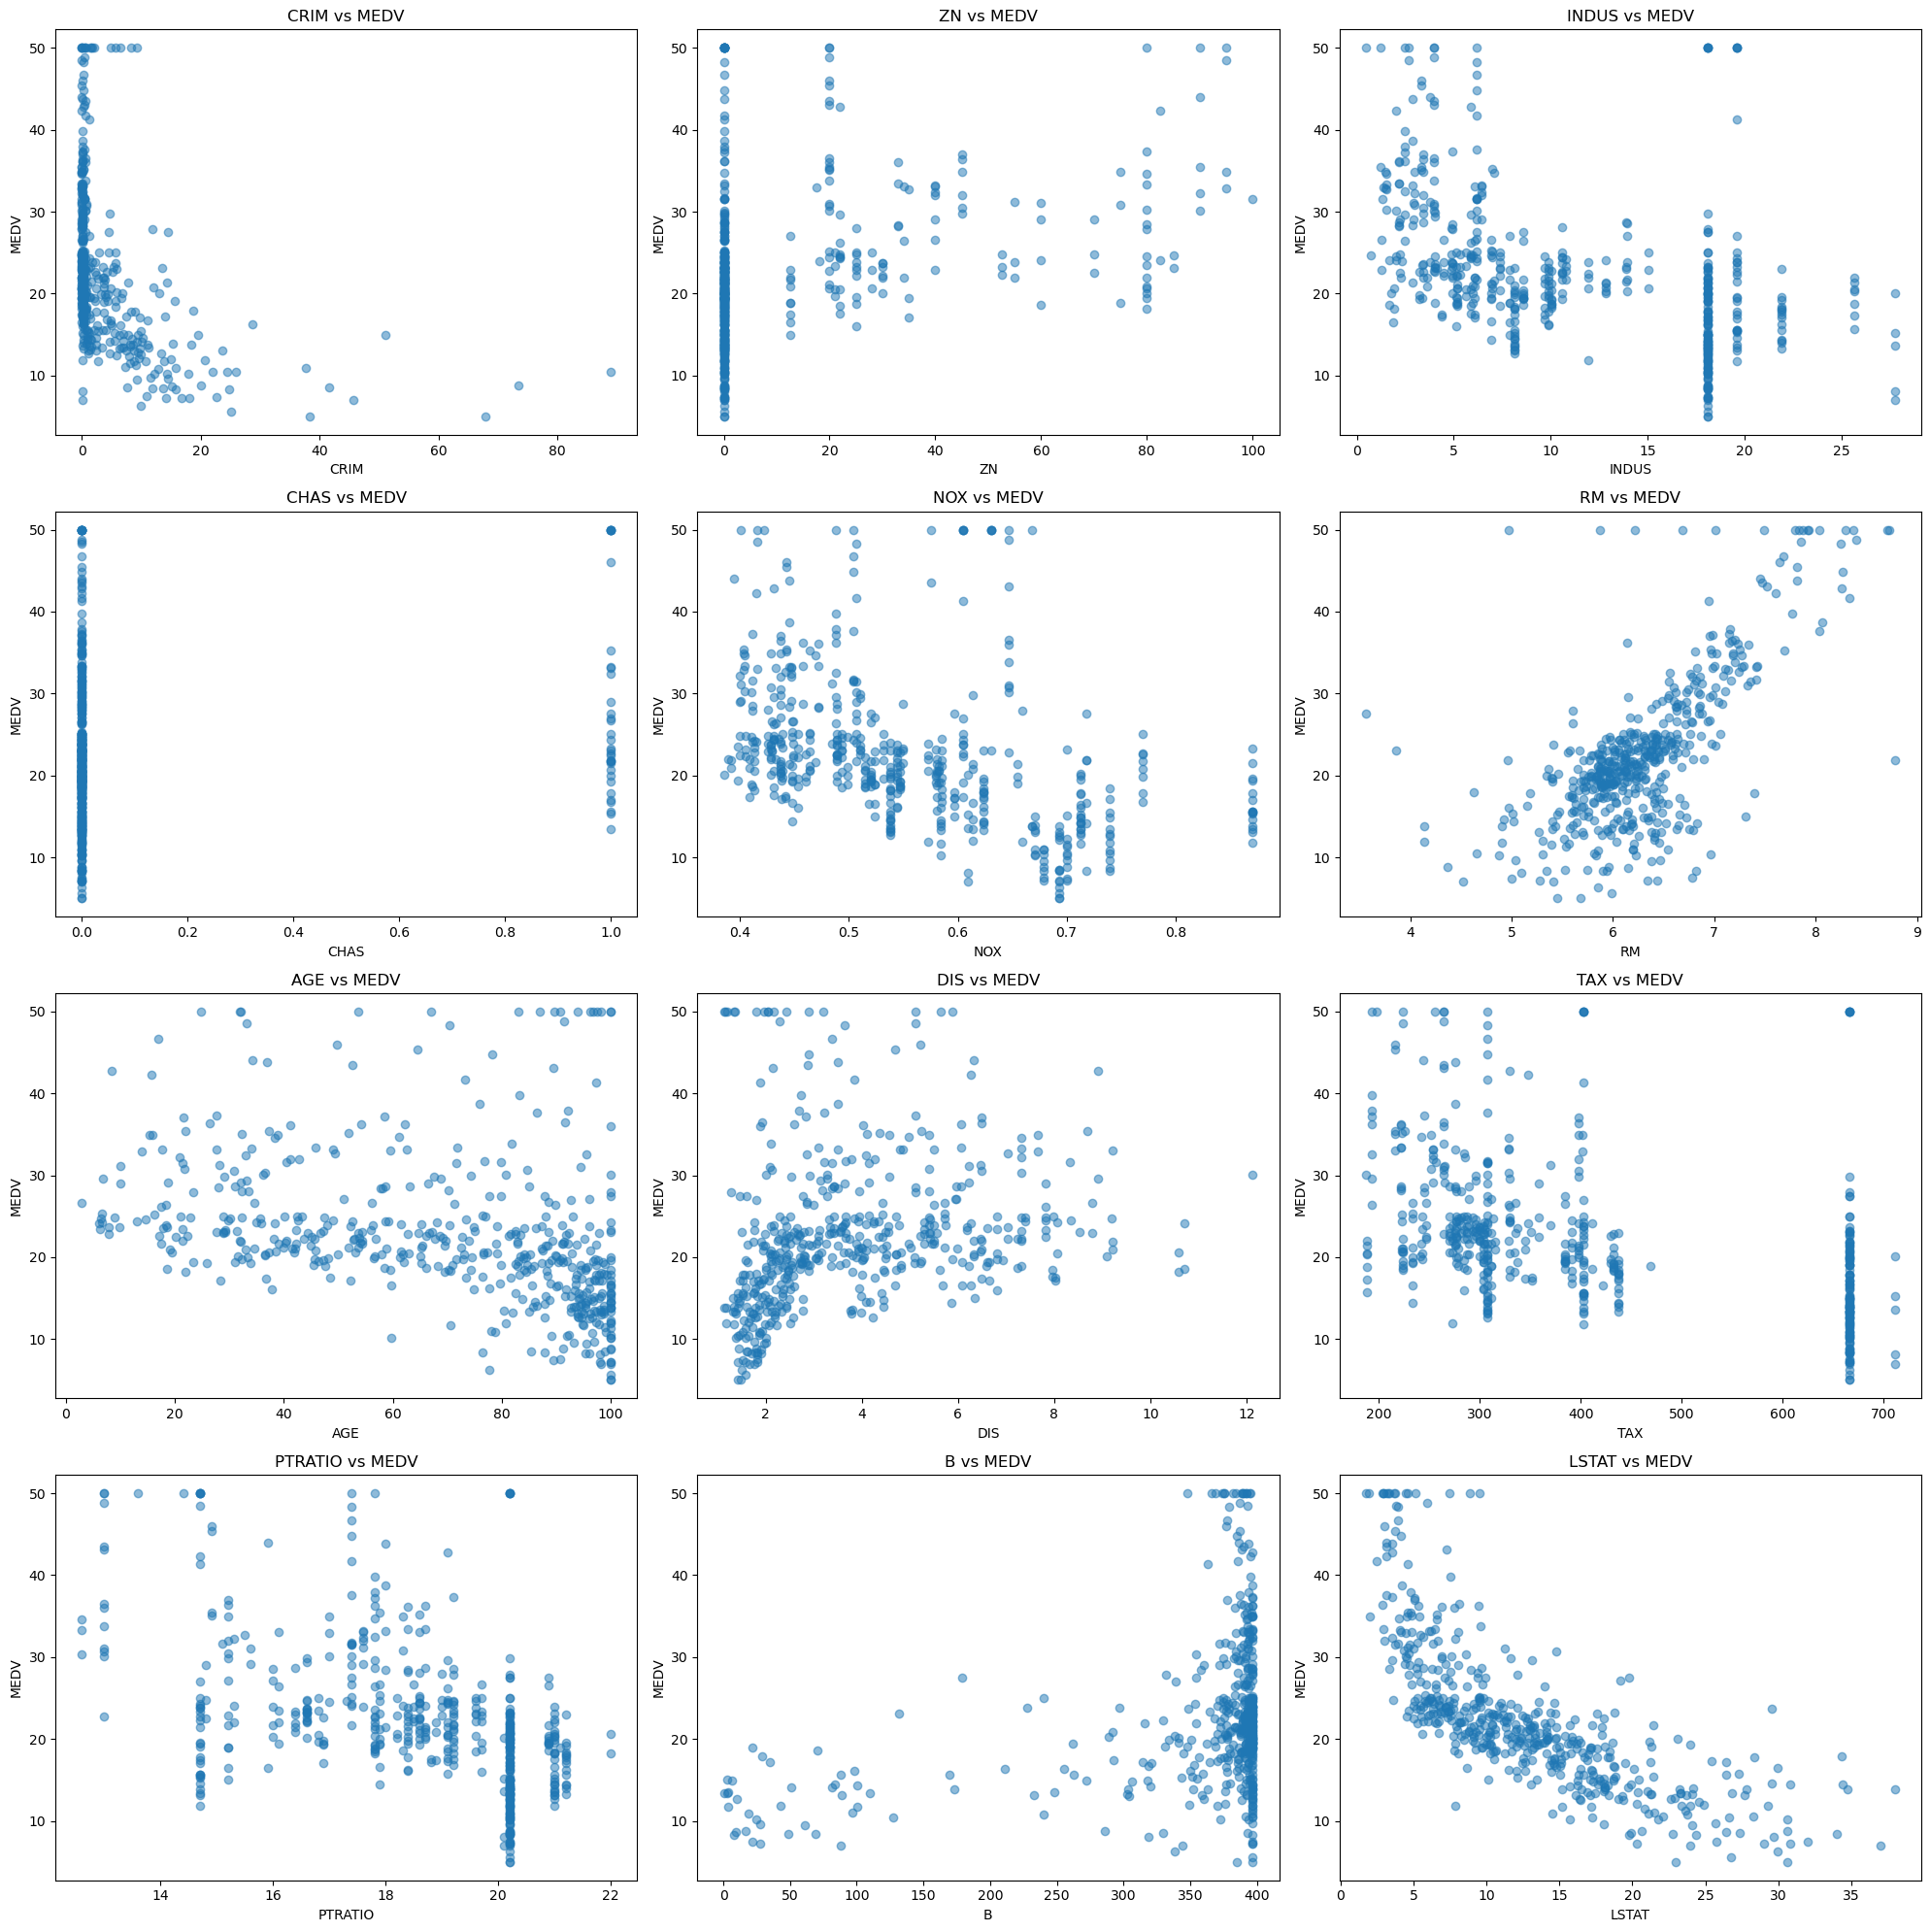

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

columns = X.columns

for i, column in enumerate(columns):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[column], y, alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('MEDV')
    ax.set_title(f'{column} vs MEDV')

plt.tight_layout()
plt.show()


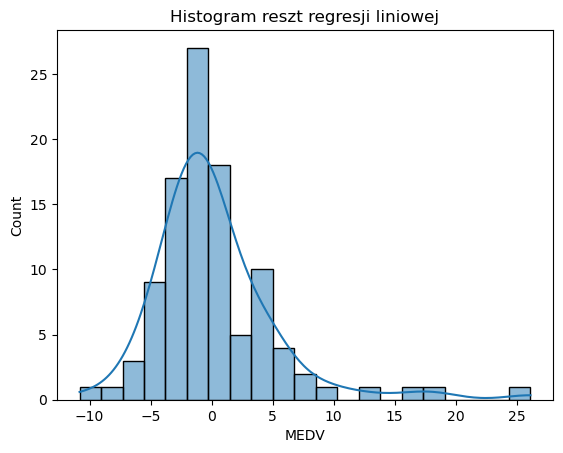

Shapiro-Wilk test p-value: 2.774530473429764e-09


In [ ]:
from scipy.stats import shapiro

residuals = y_test - y_pred_lr


sns.histplot(residuals, kde=True)
plt.title("Histogram reszt regresji liniowej")
plt.show()

# Test Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {p_value}')


Ponieważ p-value jest mniejsze niż 0.05, odrzucamy hipotezę zerową, która mówi, że reszty mają rozkład normalny. Reszty w naszym modelu regresji liniowej nie są rozkładane normalnie.


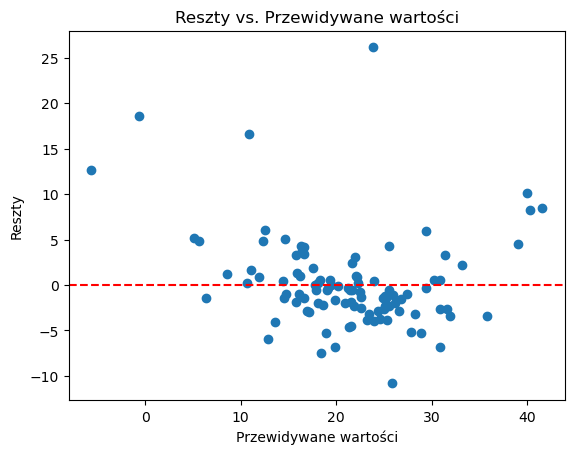

In [57]:
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.title('Reszty vs. Przewidywane wartości')
plt.show()

In [ ]:

X_const = add_constant(X_train)

vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif.sort_values("VIF", ascending=False))


   Variable         VIF
0     const  526.611842
5       NOX    4.411973
8       DIS    4.166015
3     INDUS    3.658237
9       TAX    3.331299
7       AGE    2.977080
12    LSTAT    2.807207
2        ZN    2.413664
6        RM    1.884987
10  PTRATIO    1.776290
1      CRIM    1.593872
11        B    1.318462
4      CHAS    1.084671
